Liz EDA in Python to get familiar

In [ ]:
#Exploratory Data Analysis from https://github.com/georgetown-analytics/Med-Students-Learning-Analytics/blob/master/code/exploratory_data_analysis/Exploratory_Data_Analysis.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [3]:
with open('../../data/final/processed_dataset_stanford_lemma.pkl', 'rb') as f:
    df = pickle.load(f)
df.head()

,original index,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,...,CFDA_CODE,FY_TOTAL_COST,working_abstract,nchar,Start Char,Field Count,lemma_docs_with_stop,tokened_docs_nostop,tns_bi_tri_docs,final_tokens
0,0,89996,"This is a project to explore Game-based, Metap...",2008,"This is a project to explore Game-based, Metap...",.,NSF,NSF,NaN,0814512,...,47.076,1999467.0,"This is a project to explore Game-based, Metap...",2057,T,0,"[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan..."
1,1,89997,Institution: Franklin Institute Science Museum...,2008,Institution: Franklin Institute Science Museum...,.,NSF,NSF,NaN,0741659,...,47.076,1799699.0,"Institution: Science Museum PI: Snyder, Steve...",1913,I,1,"[institution, science, Museum, pi, Snyder, Ste...","[institution, science, museum, pi, steve, proj...","[institution, science, museum, pi, steve, proj...","[institution, science, museum, pi, steve, proj..."
2,2,89998,Through programs (including small group conver...,2008,Through programs (including small group conver...,.,NSF,NSF,NaN,0813522,...,47.076,1505858.0,Through programs (including small group conver...,1154,T,0,"[program, include, small, group, conversation,...","[program, small, group, conversation, citizen,...","[program, small, group, conversation, citizen,...","[program, small, group, conversation, citizen,..."
3,3,89999,In partnership with the American Chemical Soci...,2008,In partnership with the American Chemical Soci...,.,NSF,NSF,NaN,0838627,...,47.049,51000.0,In partnership with the American Chemical Soci...,826,I,0,"[partnership, American, Chemical, Society, ACS...","[partnership, american, chemical, society, acs...","[partnership, american, chemical, society, acs...","[partnership, american, chemical, society, acs..."
4,4,90000,Amphibian populations around the world are exp...,2008,Amphibian populations around the world are exp...,.,NSF,NSF,NaN,0815315,...,47.074,370996.0,Amphibian populations around the world are exp...,1322,A,1,"[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec..."


In [4]:
#Find the size of the data
num_abstracts, num_features = df.shape

print(num_abstracts)
print(num_features)

543433
25


In [5]:
# Change the max number of columns that we can display.  Now we will be able to see all columns of data when 
# we call the method head().

pd.set_option('display.max_columns', 75)
df.head()

,original index,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST,working_abstract,nchar,Start Char,Field Count,lemma_docs_with_stop,tokened_docs_nostop,tns_bi_tri_docs,final_tokens
0,0,89996,"This is a project to explore Game-based, Metap...",2008,"This is a project to explore Game-based, Metap...",.,NSF,NSF,NaN,0814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,Achievement; analog; base; Cognitive Science; ...,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",WHEELING JESUIT UNIVERSITY,47.076,1999467.0,"This is a project to explore Game-based, Metap...",2057,T,0,"[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan...","[project, explore, game, base, metaphor, enhan..."
1,1,89997,Institution: Franklin Institute Science Museum...,2008,Institution: Franklin Institute Science Museum...,.,NSF,NSF,NaN,0741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,Active Learning; Child; Computer software; des...,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",FRANKLIN INSTITUTE,47.076,1799699.0,"Institution: Science Museum PI: Snyder, Steve...",1913,I,1,"[institution, science, Museum, pi, Snyder, Ste...","[institution, science, museum, pi, steve, proj...","[institution, science, museum, pi, steve, proj...","[institution, science, museum, pi, steve, proj..."
2,2,89998,Through programs (including small group conver...,2008,Through programs (including small group conver...,.,NSF,NSF,NaN,0813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,Address; Age; Birth; Brain; Caregivers; Child;...,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",SCIENCE MUSEUM OF MINNESOTA,47.076,1505858.0,Through programs (including small group conver...,1154,T,0,"[program, include, small, group, conversation,...","[program, small, group, conversation, citizen,...","[program, small, group, conversation, citizen,...","[program, small, group, conversation, citizen,..."
3,3,89999,In partnership with the American Chemical Soci...,2008,In partnership with the American Chemical Soci...,.,NSF,NSF,NaN,0838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,Advanced Development; American; Chemicals; Che...,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,47.049,51000.0,In partnership with the American Chemical Soci...,826,I,0,"[partnership, American, Chemical, Society, ACS...","[partnership, american, chemical, society, acs...","[partnership, american, chemical, society, acs...","[partnership, american, chemical, society, acs..."
4,4,90000,Amphibian populations around the world are exp...,2008,Amphibian populations around the world are exp...,.,NSF,NSF,NaN,0815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,Amphibia; Central America; Communicable Diseas...,"ZAMUDIO, KELLY R",NaN,CORNELL UNIVERSITY ITHACA,47.074,370996.0,Amphibian populations around the world are exp...,1322,A,1,"[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec...","[amphibian, population, world, experience, dec..."


In [6]:
# check data type for each feature

df.dtypes

original index                 int64
PROJECT_ID                     int64
ABSTRACT                      object
FY                             int64
FIRST_CHAR                    object
LAST_CHAR                     object
DEPARTMENT                    object
AGENCY                        object
IC_CENTER                     object
PROJECT_NUMBER                object
PROJECT_TITLE                 object
PROJECT_TERMS                 object
CONTACT_PI_PROJECT_LEADER     object
OTHER_PIS                     object
ORGANIZATION_NAME             object
CFDA_CODE                     object
FY_TOTAL_COST                float64
working_abstract              object
nchar                          int64
Start Char                    object
Field Count                    int64
lemma_docs_with_stop          object
tokened_docs_nostop           object
tns_bi_tri_docs               object
final_tokens                  object
dtype: object

In [8]:
#determine number of each _

df['DEPARTMENT'].value_counts()


HHS     374362
NSF     116475
USDA     27190
NASA     10611
DOD       6940
VA        4860
EPA       1539
ED        1456
Name: DEPARTMENT, dtype: int64

In [9]:
df['AGENCY'].value_counts()

NIH        366627
NSF        116475
NIFA        25297
NASA        10611
CDMRP        6696
VA           4860
ALLCDC       2677
AHRQ         2581
ARS          1648
EPA          1539
IES          1456
FDA          1396
NIDILRR       799
ACF           282
FS            245
CNRM          130
DVBIC          92
CCCRP          22
Name: AGENCY, dtype: int64

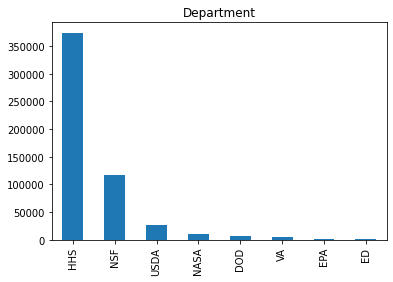

In [10]:
#histogram of department
df['DEPARTMENT'].value_counts().plot(kind = 'bar', title = 'Department')

In [ ]:
#pie chart of agency